<a href="https://colab.research.google.com/github/imatyushov/math-stat-hse-itmo/blob/main/lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Изучение поведения доверительных интервалов при изменении размера выборки и величины доверительной вероятности. Исследование действительного значения доверительной вероятности при отклонении условий построения доверительного интервала от предполагаемых.

1. Генерировать выборки из разных распределений разного размера. Построить доверительные интервалы для математического ожидания (с коэффициентом Стьюдента) по каждой из выборок. Построить зависимость ширины интервала от размера выборки, от величины доверительной вероятности.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
sample_sizes = np.linspace(100, 1_000, 100)
confidence_level = 0.95
mu = 0
sigma = 1
sample_nums = 10 ** 3

In [ ]:
def create_confidence_interval(sample, confidence=0.95):
  n = len(sample)
  mean_val = np.mean(sample)
  sem = stats.sem(sample) # стандартная ошибка среднего
  h = sem * stats.t.ppf((1 + confidence) / 2., n-1)
  return mean_val - h, mean_val + h

Число наблюдений |    Фактическая вероятность покрытия
         1000.0 |                              0.9460

Среднее значение вероятности покрытия: 0.946



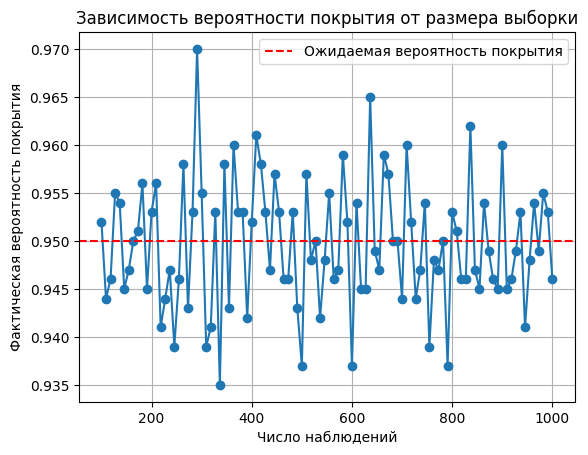

In [ ]:
results = []

for i in sample_sizes:
    coverage_counter = 0
    for j in range(sample_nums):

        sample = np.random.normal(mu, sigma, int(i))
        ci_lower, ci_upper = create_confidence_interval(sample, confidence=confidence_level)

        # Попадания в интервал
        if ci_lower <= mu <= ci_upper:
            coverage_counter += 1

    # Смотрим покрытие
    real_coverage_counter = coverage_counter / sample_nums
    results.append((i, real_coverage_counter))

print(f"{'Число наблюдений':>15} | {'Фактическая вероятность покрытия':>35}")
for n, coverage in results:
    if n % 1000 == 0:
      print(f"{n:>15} | {coverage:>35.4f}")
print(f"\nСреднее значение вероятности покрытия: {np.mean(coverage)}\n")

sample_sizes_plot, coverage_plot = zip(*results)
plt.plot(sample_sizes_plot, coverage_plot, marker='o')
plt.axhline(y=confidence_level, color='r', linestyle='--', label='Ожидаемая вероятность покрытия')
plt.xlabel('Число наблюдений')
plt.ylabel('Фактическая вероятность покрытия')
plt.title('Зависимость вероятности покрытия от размера выборки')
plt.legend()
plt.grid()
plt.show()

2. Исследовать, совпадает ли назначенное значение доверительной вероятности (Q = 0,95) с реально достигаемым. Для этого сгенерировать для каждого значения размера выборки из набора (n = 10, 20, 30, 50, 60) большое количество выборок (N = 103) и посчитать, какое количество из них будет в самом деле содержать точное значение математического ожидания.

In [ ]:
def gen_normal_sample(n, mean=0, std_dev=1):
    return np.random.normal(loc=mean, scale=std_dev, size=n)

def gen_uniform_sample(n):
    return np.random.uniform(low=-1, high=1, size=n)

def compute_confidence_interval(sample, confidence_level):
    n = len(sample)
    mean, se = np.mean(sample), stats.sem(sample)
    margin = se * stats.t.ppf((1 + confidence_level) / 2, n - 1)
    return mean, margin

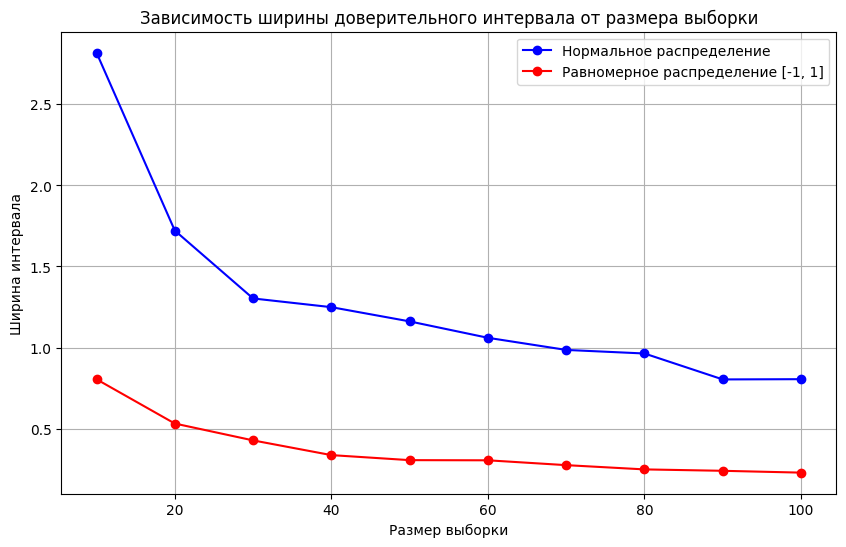

In [ ]:
sample_sizes = np.arange(10, 101, 10)

confidence_level = 0.95

intervals_width_normal = []
intervals_width_uniform = []
sample_sizes_list = []

mean_normal = 0
std_dev_normal = 2

for n in sample_sizes:
    normal_sample = gen_normal_sample(n, mean=mean_normal, std_dev=std_dev_normal)
    mean, margin = compute_confidence_interval(normal_sample, confidence_level)
    interval_width = 2 * margin
    intervals_width_normal.append(interval_width)
    sample_sizes_list.append(n)

for n in sample_sizes:
    uniform_sample = gen_uniform_sample(n)
    mean, margin = compute_confidence_interval(uniform_sample, confidence_level)
    interval_width = 2 * margin
    intervals_width_uniform.append(interval_width)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes_list, intervals_width_normal, marker='o', linestyle='-', color='b', label='Нормальное распределение')
plt.plot(sample_sizes_list, intervals_width_uniform, marker='o', linestyle='-', color='r', label='Равномерное распределение [-1, 1]')
plt.title('Зависимость ширины доверительного интервала от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('Ширина интервала')
plt.legend()
plt.grid(True)
plt.show()